In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [39]:
file_path = '../../data/dataS.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

df.head()

C:\Users\paula\AppData\Local\Temp\ipykernel_320\314432953.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'])


,Date,Open,High,Low,Close,SP500_Adj_Close,move,Volume,volatility,volatility_forcast,returns,GARCH_VM
0,0.0001273723092599669,0.047659,0.002928,0.001520,0.000581,0.048240,1,0.069794,0.066817,0.211467,0.584310,0.047215
1,0.0005094892370398676,0.047568,0.001414,0.002760,0.004918,0.052485,0,0.097281,0.211467,0.091160,0.621878,0.037729
2,0.0006368615462998344,0.051804,0.003021,0.000884,0.000582,0.051221,0,0.107127,0.091160,0.128589,0.574153,0.031900
3,0.0007642338555598013,0.050542,0.003392,0.000271,0.002023,0.048519,1,0.100136,0.128589,0.164762,0.561691,0.025633
4,0.0008916061648197682,0.047846,0.000419,0.002761,0.004340,0.052186,0,0.108488,0.164762,0.133090,0.616871,0.021176


In [40]:
df.describe()


,Open,High,Low,Close,SP500_Adj_Close,move,Volume,volatility,volatility_forcast,returns,GARCH_VM
count,5369.000000,5369.000000,5369.000000,5.369000e+03,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,0.305691,0.002560,0.002656,3.201448e-03,0.307003,0.544980,0.295592,0.095812,0.095808,0.586629,0.014663
std,0.242488,0.001908,0.002399,3.496880e-03,0.243057,0.498019,0.122345,0.086634,0.086636,0.047740,0.039962
min,0.000000,0.000004,0.000002,4.574376e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.115170,0.001497,0.001384,1.001839e-03,0.115963,0.000000,0.230972,0.043805,0.043798,0.571146,0.001507
50%,0.211266,0.002469,0.002366,2.087271e-03,0.212354,1.000000,0.294744,0.073087,0.073087,0.587300,0.003728
75%,0.443331,0.003352,0.003151,4.058097e-03,0.445243,1.000000,0.353402,0.117945,0.117945,0.603436,0.012355
max,1.000000,0.029935,0.029114,3.290871e-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5369 non-null   object 
 1   Open                5369 non-null   float64
 2   High                5369 non-null   float64
 3   Low                 5369 non-null   float64
 4   Close               5369 non-null   float64
 5   SP500_Adj_Close     5369 non-null   float64
 6   move                5369 non-null   int64  
 7   Volume              5369 non-null   float64
 8   volatility          5369 non-null   float64
 9   volatility_forcast  5369 non-null   float64
 10  returns             5369 non-null   float64
 11  GARCH_VM            5369 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 503.5+ KB


        volatility
count  5369.000000
mean      0.095812
std       0.086634
min       0.000000
25%       0.043805
50%       0.073087
75%       0.117945
max       1.000000


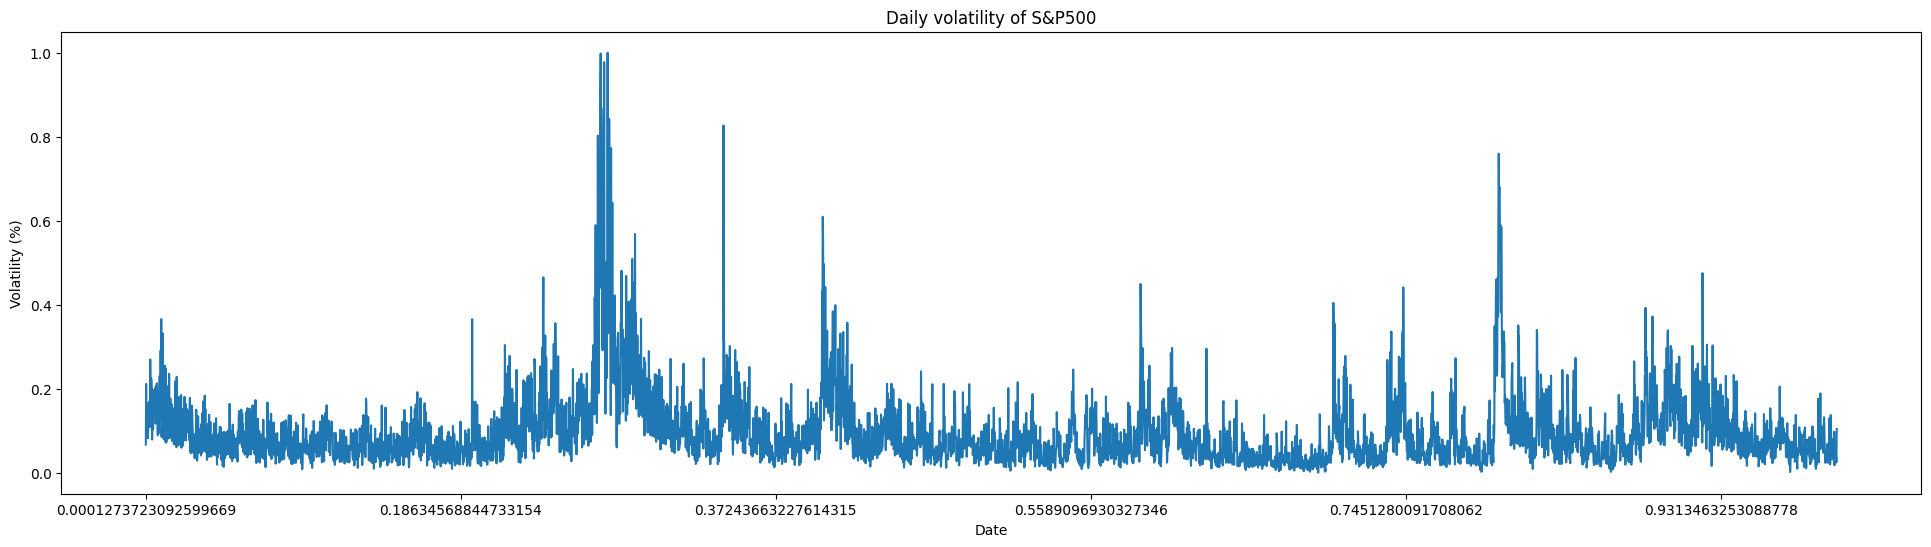

In [42]:
print(df[['Date', 'volatility']].describe())

df.set_index('Date')['volatility'].plot(figsize=(24, 6))
plt.title("Daily volatility of S&P500")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.show()

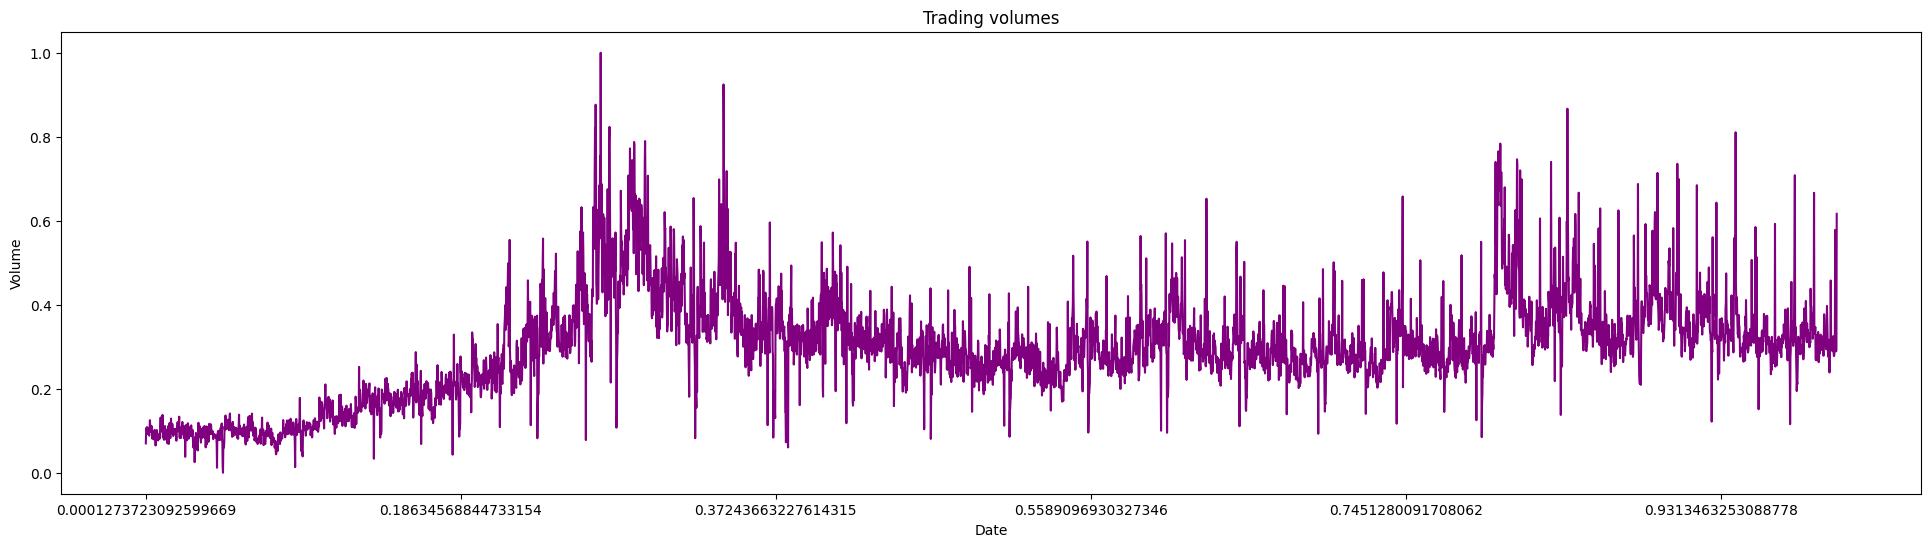

In [43]:
df.set_index('Date')['Volume'].plot(figsize=(24, 6), color='purple')
plt.title("Trading volumes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


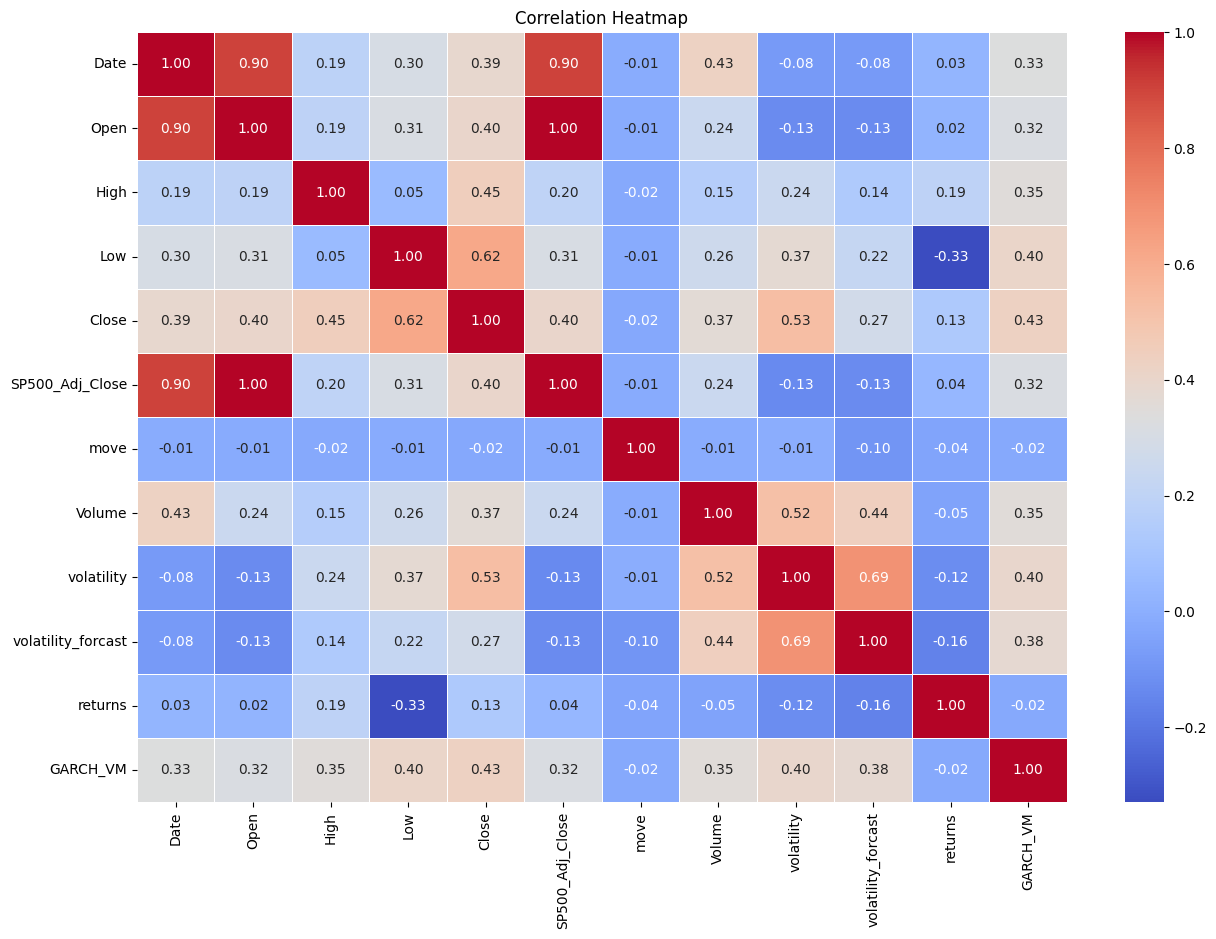

In [44]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_320\2922925087.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['volatility_forcast'], shade=True)


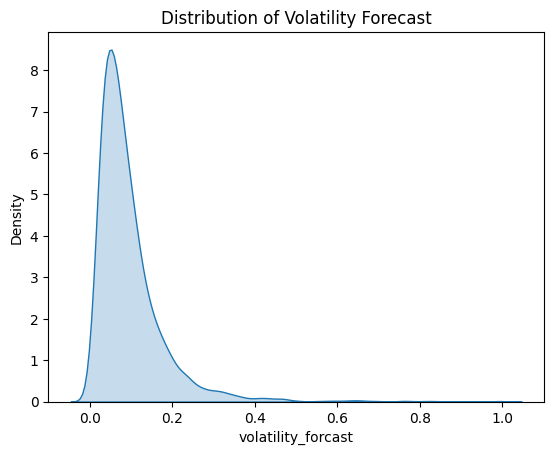

In [45]:
sns.kdeplot(df['volatility_forcast'], shade=True)
plt.title('Distribution of Volatility Forecast')
plt.show()


In [46]:
sns.pairplot(df[['returns', 'volatility_forcast', 'GARCH_VM', 'EWMA_VM']])
plt.show()


KeyError: "['EWMA_VM'] not in index"

In [47]:
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = df.drop(['Date', 'volatility_forcast'], axis=1)
y = df['volatility_forcast']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


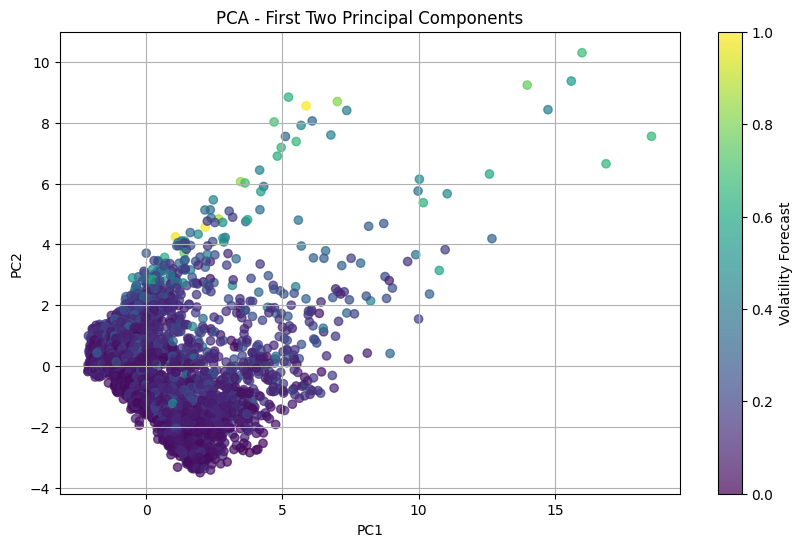

  Principal Component  Explained Variance Ratio
0                 PC1                  0.336917
1                 PC2                  0.179049


In [48]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# Explain variance ratio
explained_variance = pd.DataFrame(
    {'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
     'Explained Variance Ratio': pca.explained_variance_ratio_}
)
print(explained_variance)


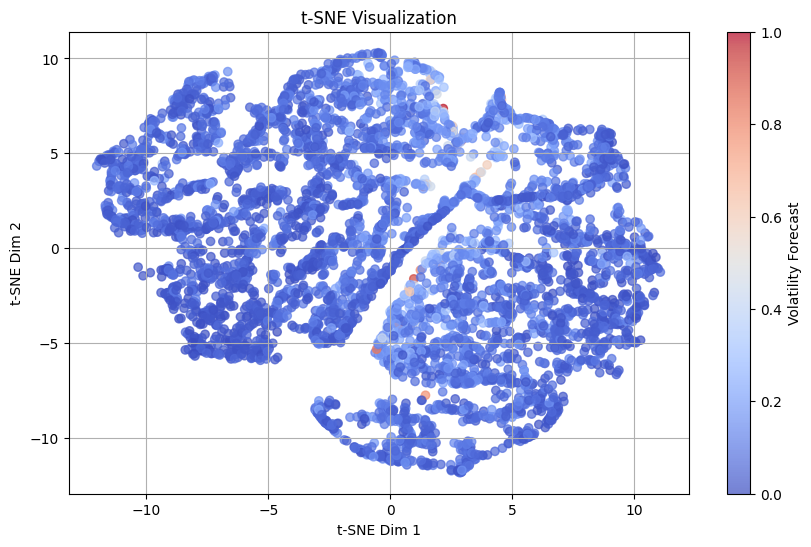

In [49]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.grid()
plt.show()


c:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


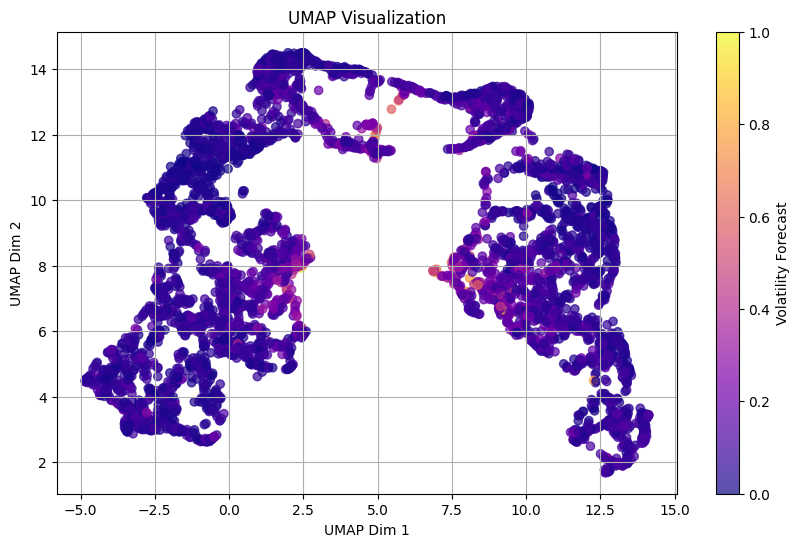

In [50]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualize UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.colorbar(label='Volatility Forecast')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


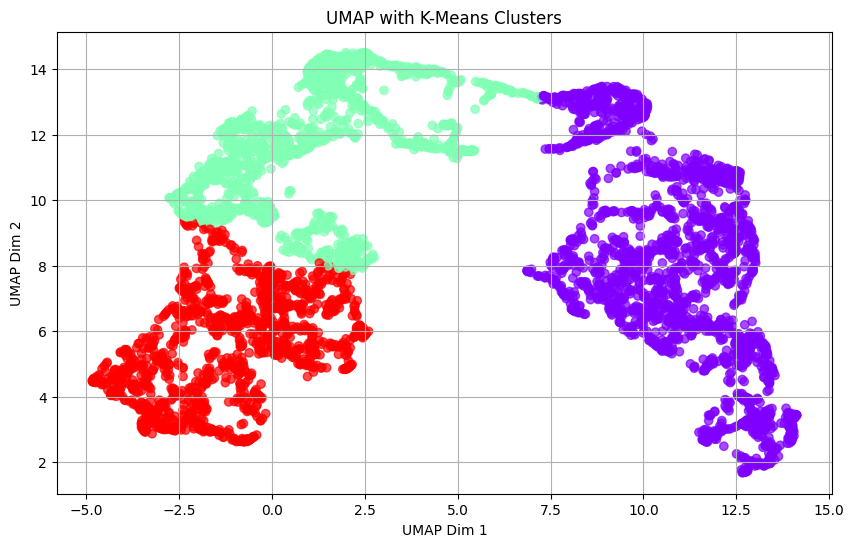

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_umap)

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.title('UMAP with K-Means Clusters')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.grid()
plt.show()


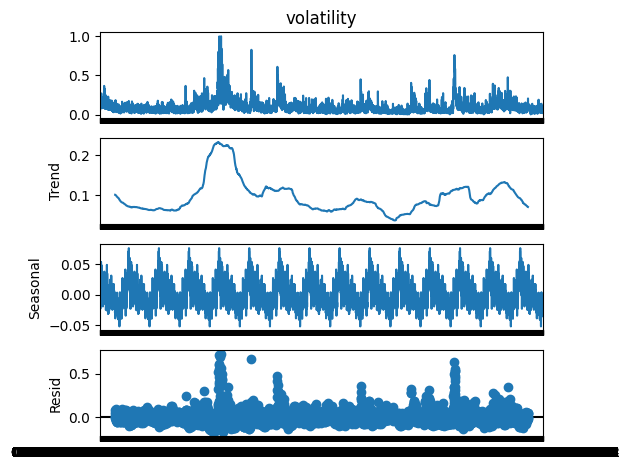

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.set_index('Date')['volatility'], model='additive', period=365)
decomposition.plot()
plt.show()


In [53]:
# TO BE CONTINUE